In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
! pip install koreanize_matplotlib
import koreanize_matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [7]:
brand_frcs_df = pd.read_csv('./brand_frcs_stats_2023_full.csv')  
brand_frcs_df.head()

yr indutyLclasNm indutyMlsfcNm     corpNm    brandNm  frcsCnt  \
0  2023            Ïô∏Ïãù            ÌïúÏãù     8797Ìë∏Îìú  ÎèºÏßÄÍ∞Ä ÍπÄÏπòÏ∞úÌñàÏñ¥        4   
1  2023            Ïô∏Ïãù            ÌïúÏãù   (Ï£º)ÏúÑÌë∏ÎìúÎßàÏºì       ÎèºÏßÄ33        1   
2  2023            Ïô∏Ïãù            ÌïúÏãù   (Ï£º)ÎÑ§Ïò§ÌîåÎü¨Ïä§       ÎèºÏôïÍµ≠Î∞•        0   
3  2023            Ïô∏Ïãù            ÌïúÏãù    (Ï£º)Îç©Ïã§Îç©Ïã§        ÎèºÏäêÎû≠        0   
4  2023            Ïô∏Ïãù            ÌïúÏãù  (Ï£º)ÏôÄÏù¥Ïï§Ìã∞Ìë∏Îìú   ÎèôÌï¥Î¨ºÍ≥º ÏïÑÍµ¨Ï∞ú       11   

   newFrcsRgsCnt  ctrtEndCnt  ctrtCncltnCnt  nmChgCnt  avrgSlsAmt  \
0              2           0              0         0           0   
1              0           1              0         0      276000   
2              0           0              0         0           0   
3              0           0              0         0           0   
4             17           6              0         0           0   

   arUnitAvrgSlsAmt  
0                 0  
1             27600  
2                 0  
3                 0  
4                 0

In [9]:
df = pd.read_csv('./brand_frcs_stats_2023_full.csv')  

In [10]:
df = df.rename(columns={
    "yr": "Í∏∞Ï§ÄÏó∞ÎèÑ",
    "indutyLclasNm": "ÏóÖÏ¢ÖÎåÄÎ∂ÑÎ•ò",
    "indutyMlsfcNm": "ÏóÖÏ¢ÖÏ§ëÎ∂ÑÎ•ò",
    "corpNm": "Î≤ïÏù∏Î™Ö",
    "brandNm": "Î∏åÎûúÎìúÎ™Ö",
    "frcsCnt": "Í∞ÄÎßπÏ†êÏàò",
    "newFrcsRgsCnt": "Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò",
    "ctrtEndCnt": "Í≥ÑÏïΩÎßåÎ£åÏàò",
    "ctrtCncltnCnt": "Í≥ÑÏïΩÌï¥ÏßÄÏàò",
    "nmChgCnt": "ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò",
    "avrgSlsAmt": "Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°",
    "arUnitAvrgSlsAmt": "Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°"
    
})

In [11]:
df

Í∏∞Ï§ÄÏó∞ÎèÑ ÏóÖÏ¢ÖÎåÄÎ∂ÑÎ•ò   ÏóÖÏ¢ÖÏ§ëÎ∂ÑÎ•ò                           Î≤ïÏù∏Î™Ö  \
0      2023    Ïô∏Ïãù      ÌïúÏãù                        8797Ìë∏Îìú   
1      2023    Ïô∏Ïãù      ÌïúÏãù                      (Ï£º)ÏúÑÌë∏ÎìúÎßàÏºì   
2      2023    Ïô∏Ïãù      ÌïúÏãù                      (Ï£º)ÎÑ§Ïò§ÌîåÎü¨Ïä§   
3      2023    Ïô∏Ïãù      ÌïúÏãù                       (Ï£º)Îç©Ïã§Îç©Ïã§   
4      2023    Ïô∏Ïãù      ÌïúÏãù                     (Ï£º)ÏôÄÏù¥Ïï§Ìã∞Ìë∏Îìú   
...     ...   ...     ...                           ...   
11162  2023   ÏÑúÎπÑÏä§  Í∏∞ÌÉÄ ÏÑúÎπÑÏä§                    (Ï£º)ÏïÑÏù¥ÏÑºÏä§Ìã∞Ïï§Ïî®   
11163  2023   ÏÑúÎπÑÏä§  Í∏∞ÌÉÄ ÏÑúÎπÑÏä§                      Ìó®Ï¶à(HENZ)   
11164  2023   ÏÑúÎπÑÏä§  Í∏∞ÌÉÄ ÏÑúÎπÑÏä§                 ÏóêÏù¥ÏπòÏïåÏã¨Î¶¨ÏÉÅÎã¥ÌîÑÎûúÏ∞®Ïù¥Ï¶à   
11165  2023   ÏÑúÎπÑÏä§  Í∏∞ÌÉÄ ÏÑúÎπÑÏä§                      (Ï£º)Ïù∏ÌÜ†ÏóêÏä§Îîî   
11166  2023   ÏÑúÎπÑÏä§  Í∏∞ÌÉÄ ÏÑúÎπÑÏä§  (Ï£º)ÎÑ§Î≤ÑÎûúÎìúÏª¥ÌçºÎãà(NEVERLANDCompany)   

                              Î∏åÎûúÎìúÎ™Ö  Í∞ÄÎßπÏ†êÏàò  Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò  Í≥ÑÏïΩÎßåÎ£åÏàò  Í≥ÑÏïΩÌï¥ÏßÄÏàò  ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò  \
0                        ÎèºÏßÄÍ∞Ä ÍπÄÏπòÏ∞úÌñàÏñ¥     4         2      0      0      0   
1                             ÎèºÏßÄ33     1         0      1      0      0   
2                             ÎèºÏôïÍµ≠Î∞•     0         0      0      0      0   
3                              ÎèºÏäêÎû≠     0         0      0      0      0   
4                         ÎèôÌï¥Î¨ºÍ≥º ÏïÑÍµ¨Ï∞ú    11        17      6      0      0   
...                            ...   ...       ...    ...    ...    ...   
11162                 CHOSIM(Ï¥àÏã¨)\t   184        15      0      3      3   
11163  HENZ music studio(Ìó®Ï¶àÎÆ§ÏßÅÏä§ÌäúÎîîÏò§)    10         0      3      0      0   
11164                   HRÏù∏(ÏóêÏù¥ÏπòÏïåÏù∏)     9         2      0      1      0   
11165  INTO STUDY PLACE(Ïù∏ÌÜ†Ïä§ÌÑ∞ÎîîÌîåÎ†àÏù¥Ïä§)     9         2      1      0      0   
11166                     ONE PLAY     0         0      0      0      0   

       Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°  Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°  
0           0           0  
1      276000       27600  
2           0           0  
3           0           0  
4           0           0  
...       ...         ...  
11162   87498        1580  
11163       0           0  
11164       0           0  
11165       0           0  
11166       0           0  

[11167 rows x 12 columns]

In [12]:
df2023 = df[df['Í∏∞Ï§ÄÏó∞ÎèÑ']==2023].copy()

In [13]:
df2023.count()

Í∏∞Ï§ÄÏó∞ÎèÑ          11167
ÏóÖÏ¢ÖÎåÄÎ∂ÑÎ•ò         11167
ÏóÖÏ¢ÖÏ§ëÎ∂ÑÎ•ò         11167
Î≤ïÏù∏Î™Ö           11167
Î∏åÎûúÎìúÎ™Ö          11167
Í∞ÄÎßπÏ†êÏàò          11167
Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò      11167
Í≥ÑÏïΩÎßåÎ£åÏàò         11167
Í≥ÑÏïΩÌï¥ÏßÄÏàò         11167
ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò         11167
Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°        11167
Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°    11167
dtype: int64

In [14]:
df2023.shape

(11167, 12)

In [15]:
df2023.describe()

Í∏∞Ï§ÄÏó∞ÎèÑ          Í∞ÄÎßπÏ†êÏàò      Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò         Í≥ÑÏïΩÎßåÎ£åÏàò        Í≥ÑÏïΩÌï¥ÏßÄÏàò  \
count  11167.0  11167.000000  11167.000000  11167.000000  11167.00000   
mean    2023.0     27.231127      5.535775      2.559506      0.89075   
std        0.0    318.889761     65.757336     31.418612     12.25569   
min     2023.0      0.000000      0.000000      0.000000      0.00000   
25%     2023.0      0.000000      0.000000      0.000000      0.00000   
50%     2023.0      1.000000      0.000000      0.000000      0.00000   
75%     2023.0     11.000000      2.000000      1.000000      0.00000   
max     2023.0  17516.000000   5563.000000   3067.000000    949.00000   

              ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò        Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°    Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°  
count  11167.000000  1.116700e+04  1.116700e+04  
mean       1.301872  1.301739e+05  5.752394e+03  
std       18.940344  1.320549e+06  1.305059e+05  
min        0.000000  0.000000e+00  0.000000e+00  
25%        0.000000  0.000000e+00  0.000000e+00  
50%        0.000000  0.000000e+00  0.000000e+00  
75%        0.000000  1.522400e+05  6.549500e+03  
max     1233.000000  1.363066e+08  1.373510e+07

In [27]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 26765 to 37931
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11167 non-null  int64 
 1   Í∏∞Ï§ÄÏó∞ÎèÑ        11167 non-null  int64 
 2   ÏóÖÏ¢ÖÎåÄÎ∂ÑÎ•ò       11167 non-null  object
 3   ÏóÖÏ¢ÖÏ§ëÎ∂ÑÎ•ò       11167 non-null  object
 4   Î≤ïÏù∏Î™Ö         11167 non-null  object
 5   Î∏åÎûúÎìúÎ™Ö        11167 non-null  object
 6   Í∞ÄÎßπÏ†êÏàò        11167 non-null  int64 
 7   Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò    11167 non-null  int64 
 8   Í≥ÑÏïΩÎßåÎ£åÏàò       11167 non-null  int64 
 9   Í≥ÑÏïΩÌï¥ÏßÄÏàò       11167 non-null  int64 
 10  ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò       11167 non-null  int64 
 11  Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°      11167 non-null  int64 
 12  Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°  11167 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.2+ MB


In [39]:
df2023[df2023['Í∞ÄÎßπÏ†êÏàò']==0].count()

Unnamed: 0    5162
Í∏∞Ï§ÄÏó∞ÎèÑ          5162
ÏóÖÏ¢ÖÎåÄÎ∂ÑÎ•ò         5162
ÏóÖÏ¢ÖÏ§ëÎ∂ÑÎ•ò         5162
Î≤ïÏù∏Î™Ö           5162
Î∏åÎûúÎìúÎ™Ö          5162
Í∞ÄÎßπÏ†êÏàò          5162
Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò      5162
Í≥ÑÏïΩÎßåÎ£åÏàò         5162
Í≥ÑÏïΩÌï¥ÏßÄÏàò         5162
ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò         5162
Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°        5162
Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°    5162
Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®         116
Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú          3
Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ      162
ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï          3
dtype: int64

In [44]:
for col in df2023.columns:
    print('\nÏª¨ÎüºÎ™Ö :', col)
    print(df2023[df2023[col]==0].count())


Ïª¨ÎüºÎ™Ö : Unnamed: 0
Unnamed: 0    0
Í∏∞Ï§ÄÏó∞ÎèÑ          0
ÏóÖÏ¢ÖÎåÄÎ∂ÑÎ•ò         0
ÏóÖÏ¢ÖÏ§ëÎ∂ÑÎ•ò         0
Î≤ïÏù∏Î™Ö           0
Î∏åÎûúÎìúÎ™Ö          0
Í∞ÄÎßπÏ†êÏàò          0
Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò      0
Í≥ÑÏïΩÎßåÎ£åÏàò         0
Í≥ÑÏïΩÌï¥ÏßÄÏàò         0
ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò         0
Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°        0
Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°    0
Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®        0
Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú       0
Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ     0
ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï       0
dtype: int64

Ïª¨ÎüºÎ™Ö : Í∏∞Ï§ÄÏó∞ÎèÑ
Unnamed: 0    0
Í∏∞Ï§ÄÏó∞ÎèÑ          0
ÏóÖÏ¢ÖÎåÄÎ∂ÑÎ•ò         0
ÏóÖÏ¢ÖÏ§ëÎ∂ÑÎ•ò         0
Î≤ïÏù∏Î™Ö           0
Î∏åÎûúÎìúÎ™Ö          0
Í∞ÄÎßπÏ†êÏàò          0
Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò      0
Í≥ÑÏïΩÎßåÎ£åÏàò         0
Í≥ÑÏïΩÌï¥ÏßÄÏàò         0
ÏÉÅÌò∏Î≥ÄÍ≤ΩÏàò         0
Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°        0
Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°    0
Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®        0
Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú       0
Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ     0
ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï       0
dtype: int64

Ïª¨ÎüºÎ™Ö : ÏóÖ

In [16]:
df2023["Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®"] = df2023["Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò"] / df2023["Í∞ÄÎßπÏ†êÏàò"].replace(0, np.nan)
df2023["Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú"] = df2023["Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°"] / df2023["Í∞ÄÎßπÏ†êÏàò"].replace(0, np.nan)
df2023["Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ"] = df2023["Í≥ÑÏïΩÌï¥ÏßÄÏàò"] / df2023["Ïã†Í∑úÍ∞ÄÎßπÏ†êÎì±Î°ùÏàò"].replace(0, np.nan)
df2023["ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï"] = df2023["Ïó∞ÌèâÍ∑†Îß§Ï∂úÏï°"] / df2023["Îã®ÏúÑÎ©¥Ï†ÅÎãπÌèâÍ∑†Îß§Ï∂úÏï°"].replace(0, np.nan)

In [17]:
features = ["Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®", "Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú", "Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ", "ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï"]
X = df2023[features]

In [18]:
X.describe()

Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®       Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú    Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ      ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï
count  6005.000000  6.005000e+03  4322.000000  4168.000000
mean      0.342477  3.409413e+04     0.329618    33.725019
std       0.403177  1.354319e+05     3.796485    44.812308
min       0.000000  0.000000e+00     0.000000     0.000019
25%       0.000000  0.000000e+00     0.000000    14.241048
50%       0.176471  5.294222e+03     0.000000    22.199226
75%       0.600000  2.404392e+04     0.000000    38.521392
max       7.666667  3.788601e+06   237.250000  1418.942424

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®     6005 non-null   float64
 1   Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú    6005 non-null   float64
 2   Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ  4322 non-null   float64
 3   ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï    4168 non-null   float64
dtypes: float64(4)
memory usage: 349.1 KB


In [20]:
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
print(f"ÌïôÏäµÏóê ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ìñâ Ïàò: {X_clean.shape[0]}")
print(X_clean.describe())

ÌïôÏäµÏóê ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Ìñâ Ïàò: 3049
            Í∞ÄÎßπÏ†êÏ¶ùÍ∞ÄÏú®       Ï†êÌè¨ÎãπÌèâÍ∑†Îß§Ï∂ú    Ìï¥ÏßÄÎπÑÏú®_Ïã†Í∑úÎåÄÎπÑ      ÌèâÍ∑†Î©¥Ï†Å_Ï∂îÏ†ï
count  3049.000000  3.049000e+03  3049.000000  3049.000000
mean      0.391326  3.431467e+04     0.414280    29.970381
std       0.359846  1.099533e+05     4.497702    28.188586
min       0.001337  8.000000e-01     0.000000     0.000019
25%       0.125000  3.295585e+03     0.000000    13.895156
50%       0.272727  1.030656e+04     0.000000    20.710936
75%       0.578947  2.869900e+04     0.000000    35.887450
max       7.666667  2.675837e+06   237.250000   368.627997


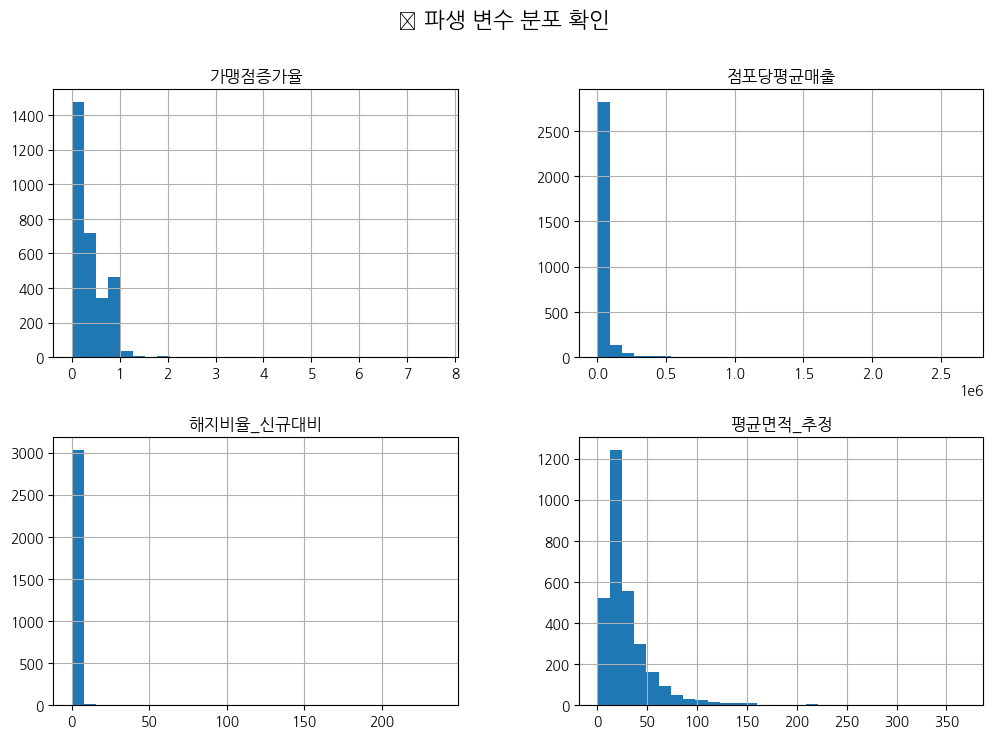

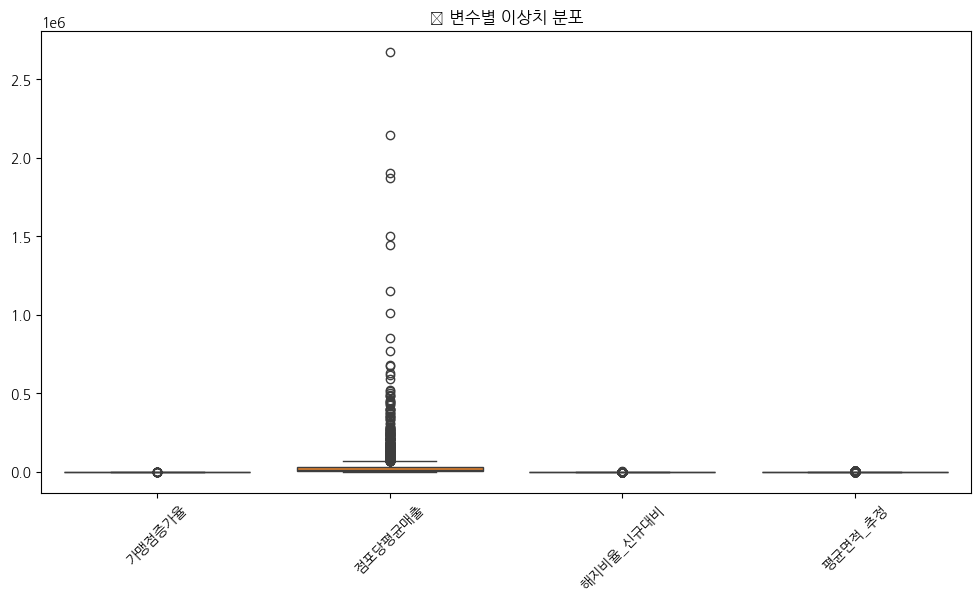

In [21]:
X_clean.hist(bins=30, figsize=(12, 8))
plt.suptitle("üìä ÌååÏÉù Î≥ÄÏàò Î∂ÑÌè¨ ÌôïÏù∏", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_clean)
plt.title("üì¶ Î≥ÄÏàòÎ≥Ñ Ïù¥ÏÉÅÏπò Î∂ÑÌè¨")
plt.xticks(rotation=45)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_clean.columns, index=X_clean.index)

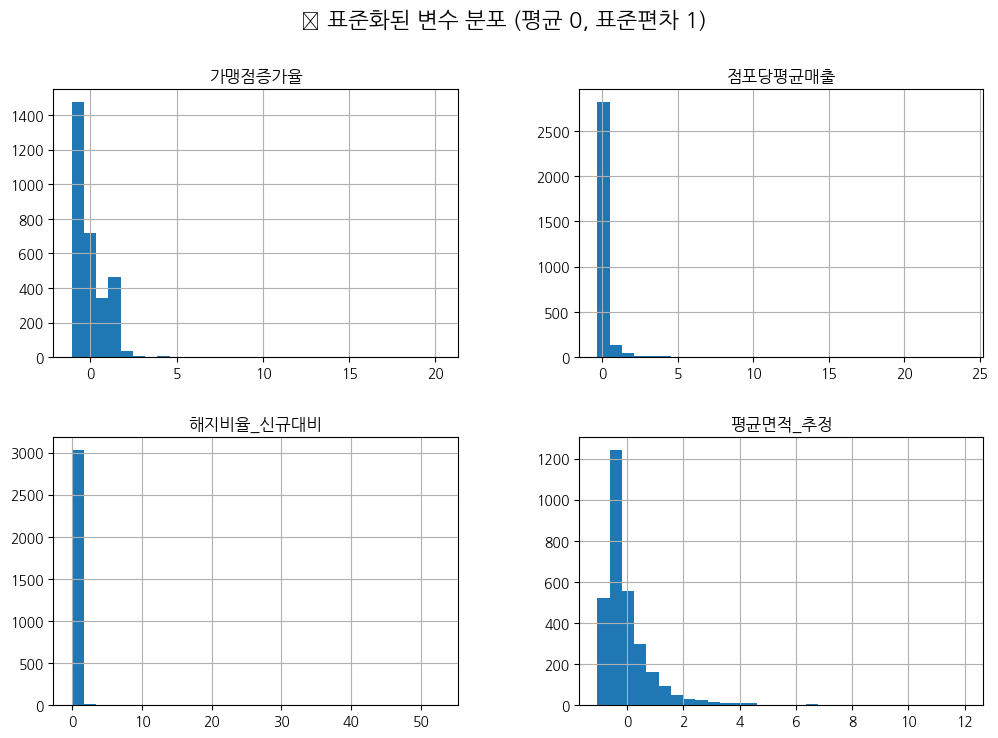

In [24]:
X_scaled_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("üìä ÌëúÏ§ÄÌôîÎêú Î≥ÄÏàò Î∂ÑÌè¨ (ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1)", fontsize=16)
plt.show()

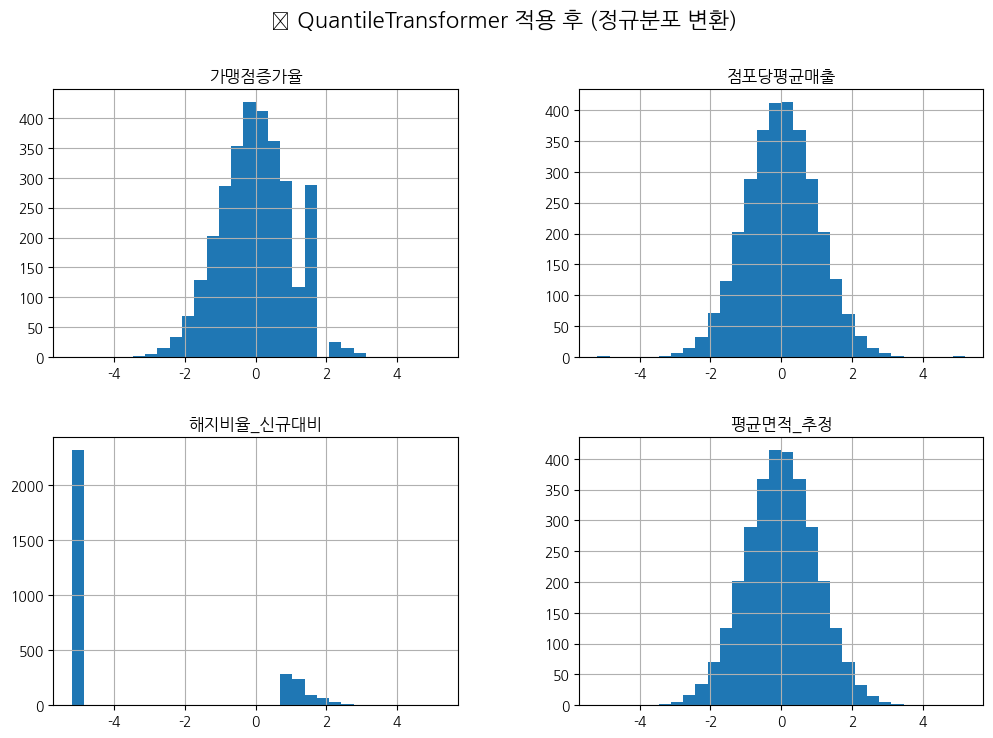

In [25]:
from sklearn.preprocessing import QuantileTransformer

qt_scaler = QuantileTransformer(output_distribution='normal', random_state=42)
X_qt_scaled = qt_scaler.fit_transform(X_clean)

X_qt_scaled_df = pd.DataFrame(X_qt_scaled, columns=X_clean.columns, index=X_clean.index)

# ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Î∂ÑÌè¨ ÌôïÏù∏
X_qt_scaled_df.hist(bins=30, figsize=(12, 8))
plt.suptitle("üìä QuantileTransformer Ï†ÅÏö© ÌõÑ (Ï†ïÍ∑úÎ∂ÑÌè¨ Î≥ÄÌôò)", fontsize=16)
plt.show()

In [29]:
from sklearn.cluster import KMeans

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò ÏÑ§Ï†ï
kmean = KMeans(n_clusters=8, n_init='auto', random_state=111)

# Î™®Îç∏ ÌïôÏäµ
kmean.fit(X_qt_scaled_df)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Í≥º SSE Ï∂úÎ†•
centroids = kmean.cluster_centers_
inertia = kmean.inertia_

/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


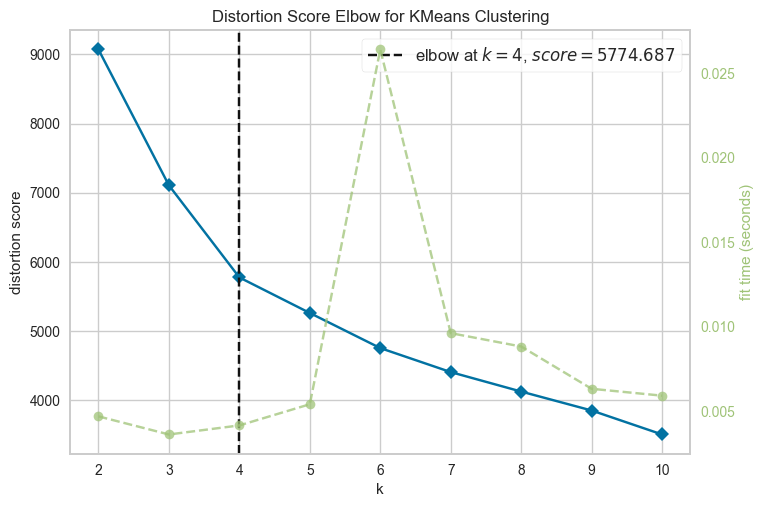

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer

KEV=KElbowVisualizer(kmean,k=10,n_init='auto')
KEV.fit(X_qt_scaled_df)
KEV.show()

In [32]:
from sklearn.cluster import KMeans

n_cluster = 4

k_means = KMeans(n_clusters=n_cluster, n_init="auto", random_state=111)
cluster_labels = k_means.fit_predict(X_qt_scaled_df)

# Ï†ÑÏ≤¥ ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò
silhouette_avg = silhouette_score(X_qt_scaled_df, cluster_labels)
print(f"ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.4f}")
# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
#X_qt_scaled_df["cluster"] = clusters

ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: 0.3698


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/leehyunjoo/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


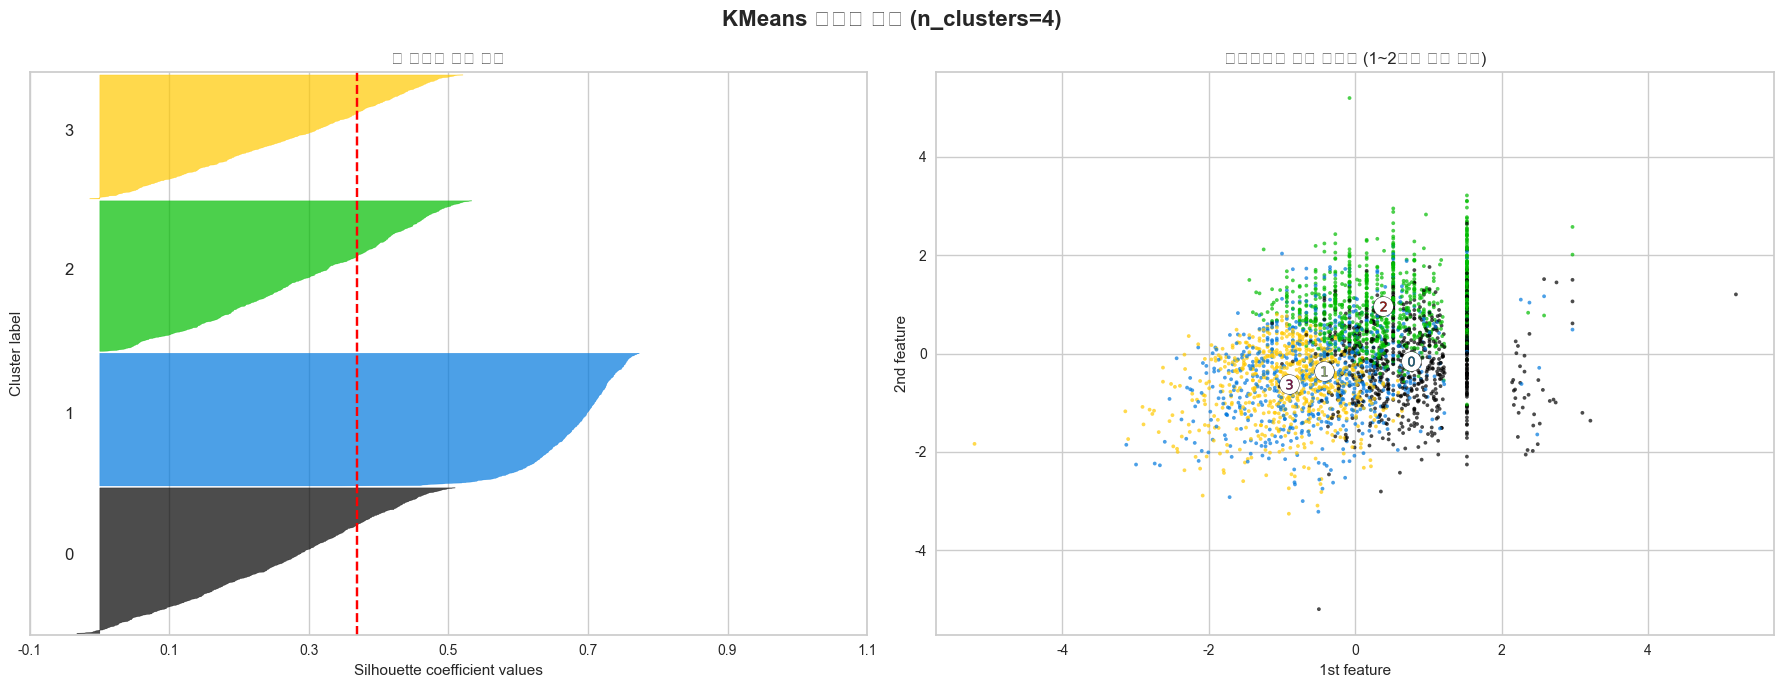

In [33]:
# ÏÉòÌîåÎ≥Ñ Ïã§Î£®Ïó£ Í∞í Í≥ÑÏÇ∞
sample_silhouette_values = silhouette_samples(X_qt_scaled_df, cluster_labels)

# ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Ïã§Î£®Ïó£ plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_qt_scaled_df) + (n_cluster + 1) * 10])

y_lower = 10
for i in range(n_cluster):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("üìà Ïã§Î£®Ïó£ Í≥ÑÏàò ÌîåÎ°Ø")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# PCA ÏóÜÏù¥ Îã®ÏàúÌûà Ïïû Îëê Î≥ÄÏàòÎ°ú Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
ax2.scatter(X_qt_scaled_df.iloc[:, 0], X_qt_scaled_df.iloc[:, 1],
            marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

centers = k_means.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white",
            alpha=1, s=200, edgecolor="k")

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

ax2.set_title("ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî (1~2Î≤àÏß∏ ÌîºÏ≤ò Í∏∞Ï§Ä)")
ax2.set_xlabel("1st feature")
ax2.set_ylabel("2nd feature")

plt.suptitle(f"KMeans Ïã§Î£®Ïó£ Î∂ÑÏÑù (n_clusters={n_cluster})", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()